In [14]:
import numpy as np
import pandas as pd
import pickle
import os
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import signal

In [15]:
path = os.listdir('/Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/')
for items in path:
    path = Path('/Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/' + items+'/' + items+'.pkl')
    if path.exists():
        print('OK', path)
        #with open(path, 'rb') as f:
            #data = pickle.load(f, encoding='bytes' )
            #print(data)
    else:
        continue

OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S5/S5.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S2/S2.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S3/S3.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S4/S4.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S17/S17.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S10/S10.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S11/S11.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S16/S16.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S8/S8.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S6/S6.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S7/S7.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S9/S9.pkl
OK /Users/dzisandy/Introduction-to-Data-Science/Final_Pr

In [16]:
with open('/Users/dzisandy/Introduction-to-Data-Science/Final_Project/WESAD/S8/S8.pkl', 'rb') as f:
    data = pickle.load(f, encoding='bytes' )


In [131]:
def MSRS(data,name,f):
    i_025 = int(f*0.25)
    i_60 = int(f*60)
    i = 0
    start = 0
    end = i_60
    mean = np.empty(int((len(scr) - i_60)/i_025))
    std = np.empty(int((len(scr) - i_60)/i_025))
    dynamic_range = np.empty(int((len(scr) - i_60)/i_025))
    slope = np.empty(int((len(scr) - i_60)/i_025))
    while i*i_025 + i_60 < int(len(data)):
        mean[i] = data[start:end+1].mean()
        std[i] = data[start:end+1].std()
        dynamic_range[i] = 20*np.log10(data[start:end+1].max()/data[start:end+1].min())
        slope[i] = (float(data[end+1]) - float(data[start]))/i_60
        i += 1
        start = i*i_025
        end = i*i_025 + i_60
    return {'mean_{}'.format(name): mean,'std_{}'.format(name):std,'dynamic_range_{}'.format(name):dynamic_range,'slope_{}'.format(name):slope}

In [132]:
 def decompose_eda(eda):
        scr_list  = []
        b,a = signal.butter(4,0.5/2)
        gsr_filt = signal.filtfilt(b,a,eda,axis=0)
        b,a = signal.butter(4,0.5/2,'highpass')
        scr = signal.filtfilt(b,a,gsr_filt,axis=0)
        scl = [float(x-y) for x,y in zip(gsr_filt,scr)]
        for i in range(len(scr)):
            scr_list.append(scr[i][0])
        return scr_list,scl

In [310]:
def SCRL(scr,scl,f):
    scr = np.array(scr)
    scl = np.array(scl)
    i_025 = int(f*0.25)
    i_60 = int(f*60)
    i = 0
    start = 0
    end = i_60
    mean_l = np.empty(int((len(scr) - i_60)/i_025))
    mean_r = np.empty(int((len(scr) - i_60)/i_025))
    std_l = np.empty(int((len(scr) - i_60)/i_025))
    std_r = np.empty(int((len(scr) - i_60)/i_025))
    peaks = np.empty(int((len(scr) - i_60)/i_025))
    peak = np.empty(int((len(scr) - i_60)/i_025))
    out = {}
    while i*i_025 + i_60 < int(len(scr)):
        mean_r[i] = scr[start:end+1].mean()
        std_r[i] = scr[start:end+1].std()
        mean_l[i] = scl[start:end+1].mean()
        std_l[i] = scl[start:end+1].std()
        peaks[i] = len(signal.find_peaks(scr[start:end+1],height = 0 ,distance=5)[0])
        #if i % 100 ==0: 
        #    print(i)
        i += 1
        start = i*i_025
        end = i*i_025 + i_60
    return {'mean_r': mean_r,'mean_l': mean_l,'std_r':std_r,'std_l':std_l,'peaks':peaks}
    

In [311]:
scr, scl = decompose_eda(data[b'signal'][b'wrist'][b'EDA'])

In [312]:
indo = SCRL(scr,scl,32)

In [313]:
indo

{'mean_r': array([ 1.52837895e-05,  7.22901011e-06,  1.01765308e-06, ...,
        -5.52133731e-07, -4.53990996e-07,  1.41699602e-09]),
 'mean_l': array([0.58006199, 0.57894902, 0.5780207 , ..., 0.28279596, 0.28278635,
        0.28275222]),
 'std_r': array([0.00104045, 0.0005343 , 0.00039108, ..., 0.00041648, 0.0004185 ,
        0.00041888]),
 'std_l': array([0.17812289, 0.17855877, 0.17905446, ..., 0.01454077, 0.01454811,
        0.01453368]),
 'peaks': array([248., 248., 247., ..., 243., 243., 243.])}

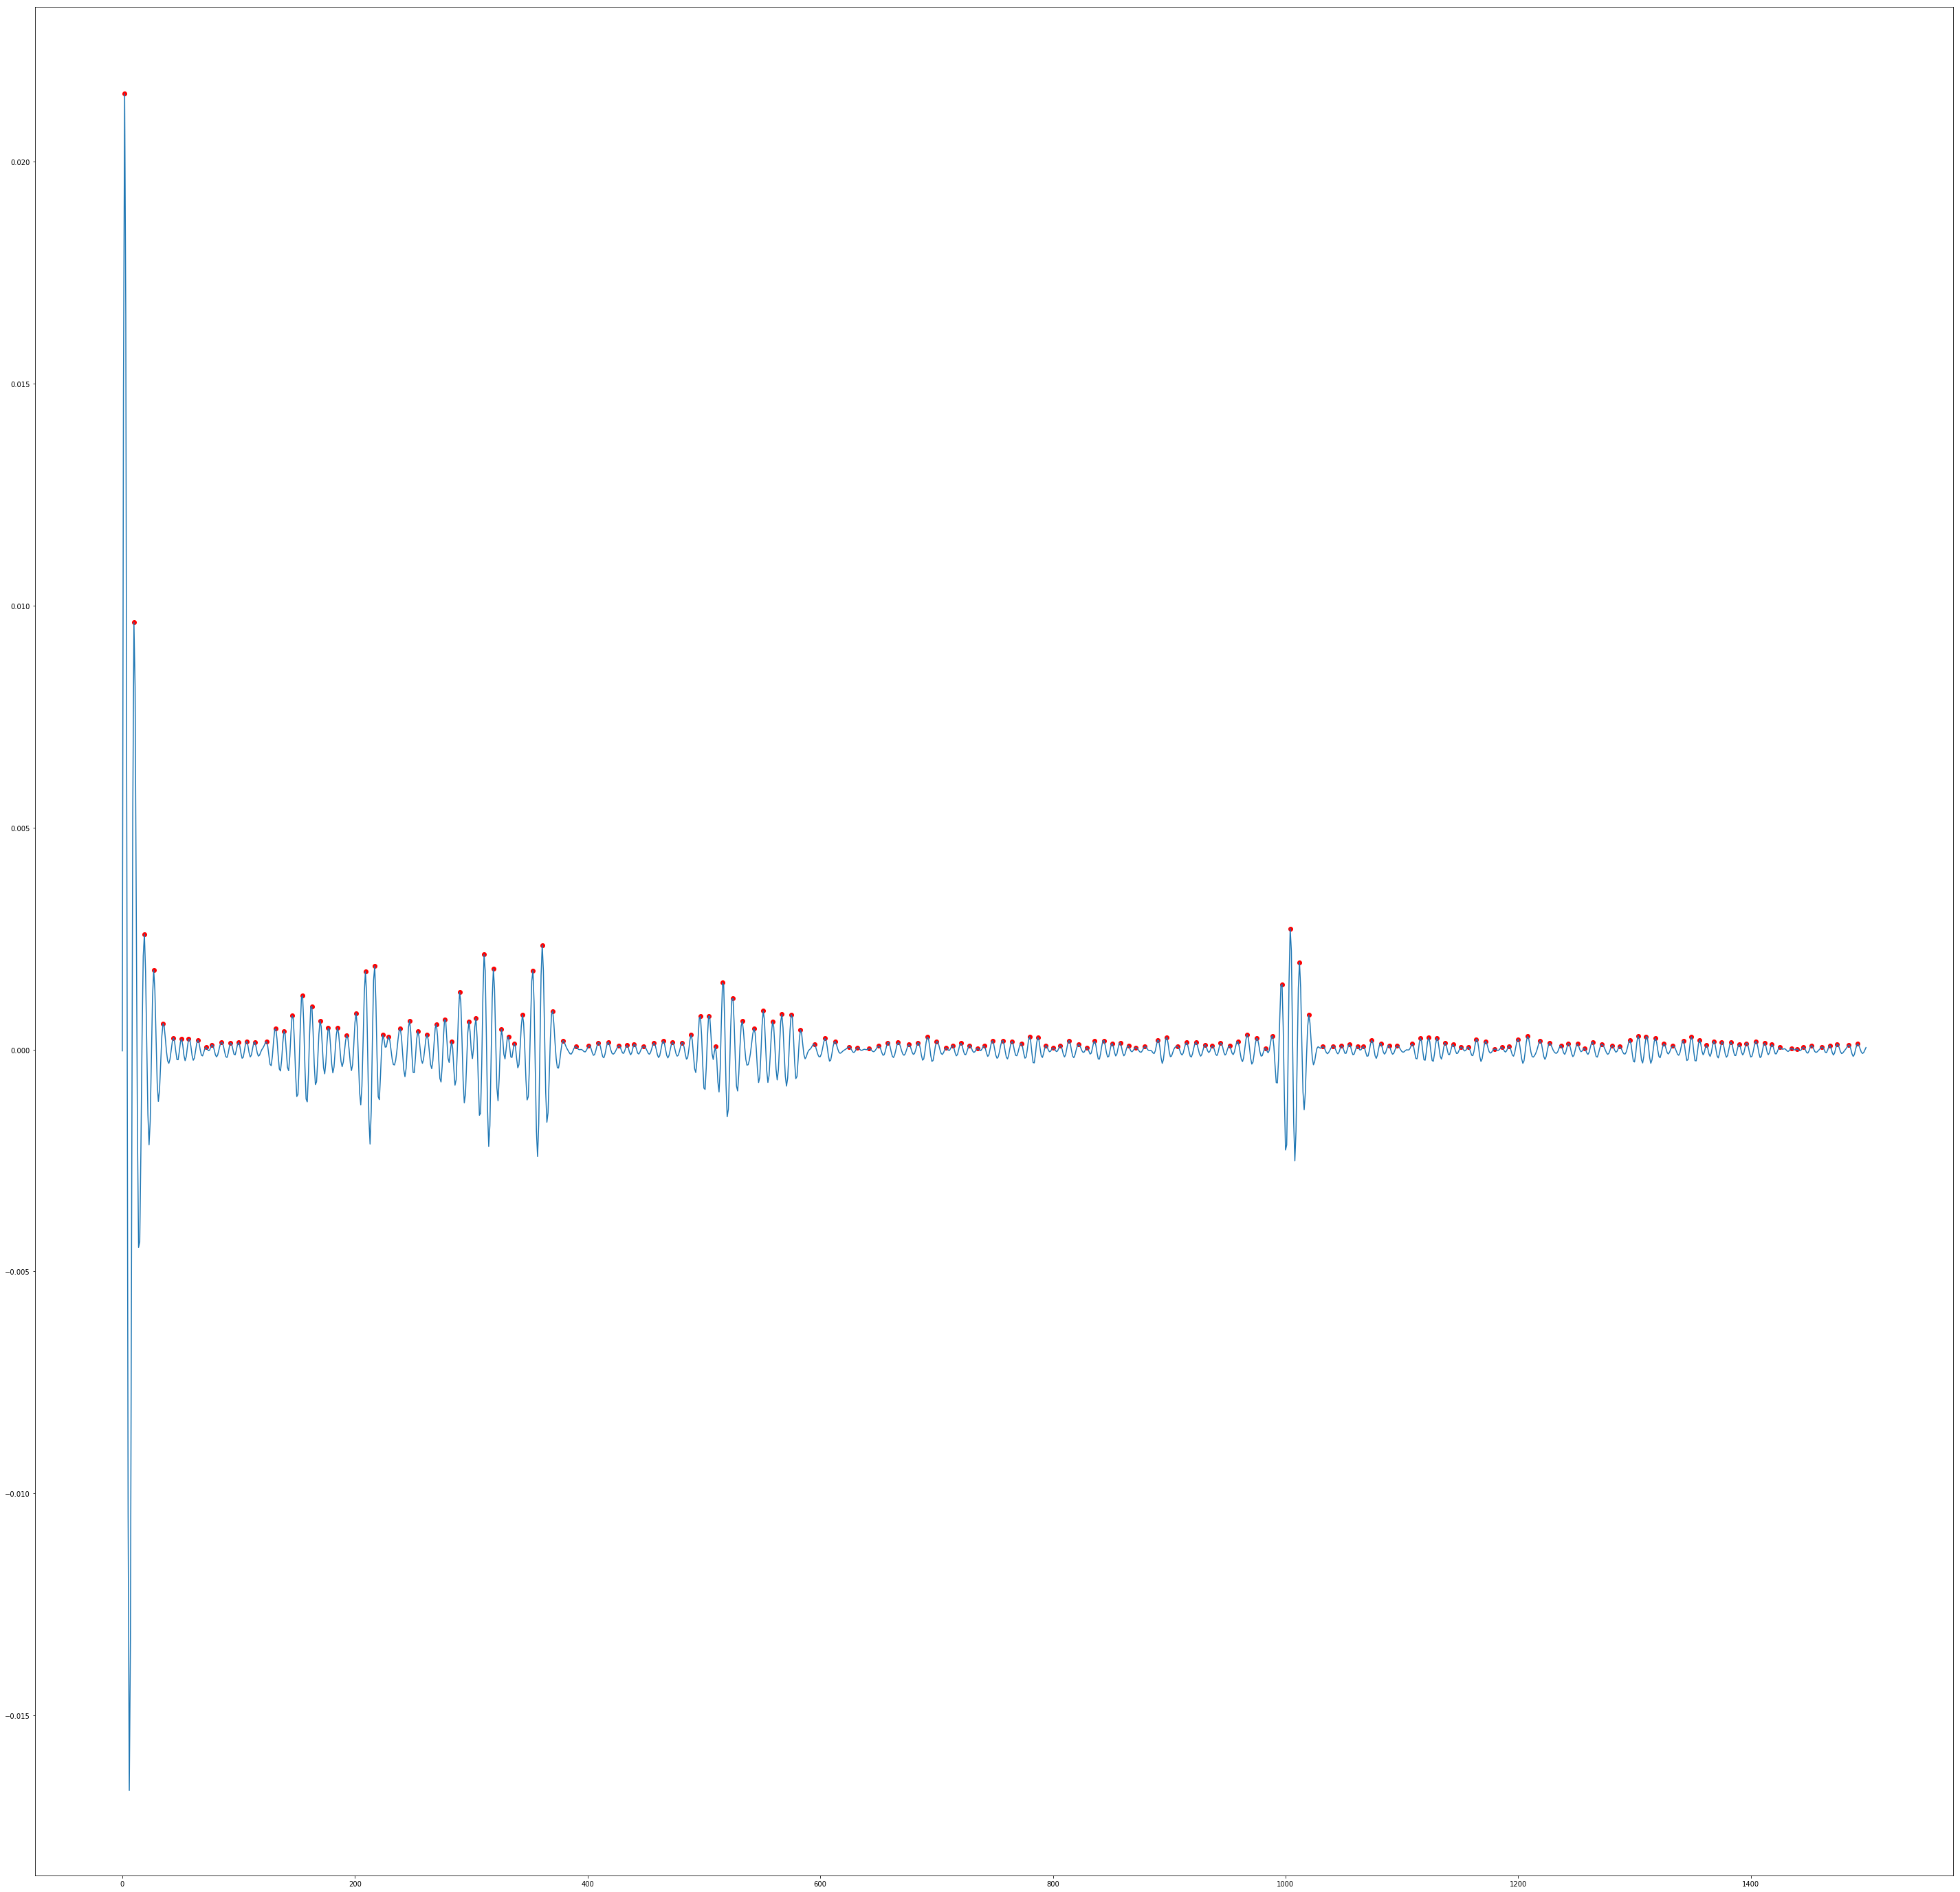

In [322]:
plt.figure(figsize=(50,50))
plt.plot(scr[0:1500])
plt.scatter(signal.find_peaks(scr[0:1500],height = 0 ,distance=5)[0], signal.find_peaks(scr[0:1500],height = 0 ,distance=5)[1]['peak_heights'], color = 'red')

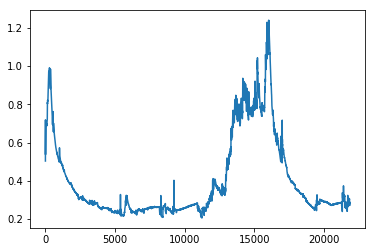

In [296]:
plt.plot(scl)

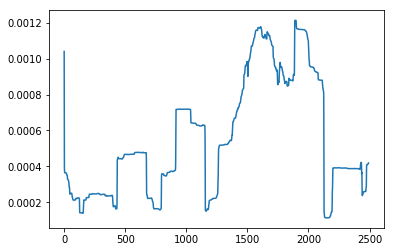

In [294]:
plt.plot(indo['std_r'])

IndexError: invalid index to scalar variable.

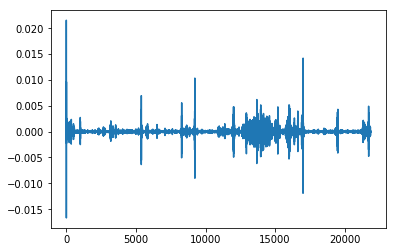

In [298]:
plt.plot(scr)
plt.scatter(indo['peaks'], indo['peaks'][1]['peak_heights'], color = 'red')

(array([  7,  14,  24,  32,  39,  46,  55,  63,  70,  77,  85,  93, 101,
       109, 117, 124, 129, 139, 147, 154, 162, 170, 177, 183, 190, 198]), {'peak_heights': array([0.00018734, 0.00016834, 0.00017819, 0.00046938, 0.00041653,
       0.00076228, 0.00121227, 0.00096771, 0.00065215, 0.00048641,
       0.00048984, 0.00032293, 0.00082174, 0.00175839, 0.00187859,
       0.00033115, 0.00029087, 0.00047007, 0.00065165, 0.00040906,
       0.00033551, 0.00057347, 0.00067313, 0.00018077, 0.00128892,
       0.00063461])})


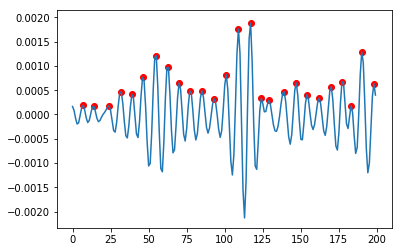

In [280]:
peaks = signal.find_peaks(scr[100:300], height = 0 ,distance=5)
print(peaks)
plt.plot(scr[100:300])
plt.scatter(peaks[0], peaks[1]['peak_heights'], color = 'red')


In [279]:
len(indo['peaks'])

2493

In [193]:
(len(data[b'signal'][b'chest'][b'EDA'])-42000)

3784200

In [224]:
def arrays_to_list(data):
    lists = []
    for i in range(len(data)):
        lists.append(emg[i][0])
    return lists

In [176]:
dat = MSRS(data[b'signal'][b'chest'][b'Temp'],'Temp',700)
#dat.keys()
#dat

In [323]:
def EMG(data,f):
    i_025 = f*0.25
    i_5 = f*5
    i = 0
    start = 0
    end = i_5
    dynamic_range = np.empty(int((len(scr) - i_5)/i_025))
    mean = np.empty(int((len(scr) - i_5)/i_025))
    std = np.empty(int((len(scr) - i_5)/i_025))
    while i*i_025 + i_5 < int(len(data)):
        mean[i] = data[start:end+1].mean()
        std[i] = data[start:end+1].std()
        #print(data[start:end+1].max(), data[start:end+1].min())
        dynamic_range[i] = 20*np.log(abs(data[start:end+1].max())/abs(data[start:end+1].min()))
        #if i % 100 ==0: 
        #    print(i)
        i += 1
        start = i*i_025
        end = i*i_025 + i_5
    return {'mean': mean, 'std':std, 'dynamic_range': dynamic_range}
        
    

In [209]:
data[b'signal'][b'chest'][b'EMG']

array([[-0.00535583],
       [ 0.00993347],
       [ 0.01478577],
       ...,
       [-0.00119019],
       [-0.0100708 ],
       [-0.00979614]])

In [211]:
len(EMG(data[b'signal'][b'chest'][b'EMG'],700)['mean'])

21844